In [1]:
%load_ext blackcellmagic

In [1]:
### import modules
import numpy as np
import matplotlib.pyplot as plt
from utils import run_scenarios
from plot import plot_scenarios
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Exploring Scenarios

In order to determine regimes in which the two different vaccine failure mechanisms result in a significant difference, we explore 9 different scenarios based on vaccination timing ($t_V$) and the fraction of population that is vaccinated ($f_V$). The scenarios are defined as follows:
- Vaccine administered when the recovered population is 0, 50% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0, 75% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0, 100% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.1, 50% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.1, 75% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.1, 100% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.25, 50% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.25, 75% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.25, 100% of the remaining susceptible population at $t_V$ is vaccinated

For each of these scenarios, the $R_0$ values are varied from 1.0 to 3.0, and vaccine efficacy is varied from 1% effective to 100% effective, and we refer to these scenarios as '$t_V$: $R = 0$, $f_V$: 50% of $(1 - f_R)$', '$t_V$: $R = 0$, $f_V$: 75% of $(1 - f_R)$', and so on, where $f_R$ is the fraction of population that has already been infected. 

We then calculate the percentage reduction of total recovered population of the leaky and all-or-nothing vaccines with respect to that of without vaccination for each simulation run with varying $R_0$ and vaccine efficay for each scenario, and the plots below show the log-scaled differences. The colorbar to the right shows the true values. Furthermore, the blank spaces in the plots are when the recovered population never reaches the target population size (the vaccine is never administered). The red lines divide regimes for which $f_V \leq f_V^*$ (above red line) vs. $f_V > f_V^*$ (below red line).

Note that we assume the vaccine campaigns are instantaneous, no reinfection occurs, and vaccine efficacy doesn't wane overtime. For continuous vaccination campaigns, refer to [4_Scenarios_cont](./4_Scenarios_cont.ipynb), and for waning vaccine efficacy, refer to [2_Scenarios_waning](./2_Scenarios_waning.ipynb). 

## Introduction
### Critical Vaccination Threshold ($f_V^*$)
The critical vaccinated threshold refers to the proportion of the population that must be vaccinated in order to reach herd immunity, preventing further transmission of the disease. This value depends on how fast the disease spreads and how effective the vaccine is, as more people would need to get vaccinated if the disease had a high $R_0$ value and low vaccine efficacy. Note that the critical vaccination level cannot exceed 1.

Recall that for this model, $R_{0,V} = R_0 (1 - \epsilon_L \epsilon_A f_V)$. From this, we can define the critical vaccination threshold as:

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0}) $$

if vaccination occurs before the epidemic begins (when the recovered population is 0).

If vaccination occurs after the epidemic has begun, a fraction $f_R$ has already been infected and are immune to reinfection. Thus, assuming an instantaneous vaccine campaign that targets only susceptible individuals,

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0(1 - f_R)})$$

Some $R_0$ and vaccine efficacy values yield $f_V^*$ values that are above the initial susceptible population. We enforce the upper bound on $f_V^*$ to be the initial susceptible population, which we define as 0.98 for our simulations.

### Percentage Reduction of Total Recovered Population

The percentage reduction of the total recovered population of leaky and all-or-nothing vaccines compared to that of without vaccination is calculated by

$$ P = \frac{R - R_V}{R} \times 100 \, (\%)$$

where $R$ is the normalized total recovered population without vaccination and $R_V$ is the normalized total recovered population with vaccination through a 'leaky' or 'all-or-nothing' vaccine.

We then found the difference by $P_A - P_L$, where $P_A$ is the percentage reduction from the all-or-nothing vaccine and $P_L$ is the percentage reduction from the leaky vaccine. Note that the difference is always positive because we find that all-or-nothing vaccines always perform better than leaky vaccines, and the plots below show $\log(P_A - P_L + 1)$.

### Default Parameter Values and Initial Conditions

The simulations are run with the following parameter values: $\gamma = 1/4$, $\sigma=1/4$, and the following initial conditions: $S(0) = 0.98$, $V_S(0) = 0$, $V_R(0) = 0$, $E(0) = 0.01$, $I(0) = 0.01$, and $R(0) = 0$. The difference is measured at 30 days after vaccination, 60 days after vaccination, 150 days after vaccination, and the end of the modeled pandemic (at 200 days). The figure used in the paper is the simulation where the difference was measured at the end of the modeled pandemic.

For more details on the model, see [Models](../Models/Models.ipynb).

## Measured 30 Days After Vaccination

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 601/601 [15:40<00:00,  1.56s/it]


Stored 'size0_m30' (DataFrame)
Stored 'size10_m30' (DataFrame)
Stored 'size25_m30' (DataFrame)


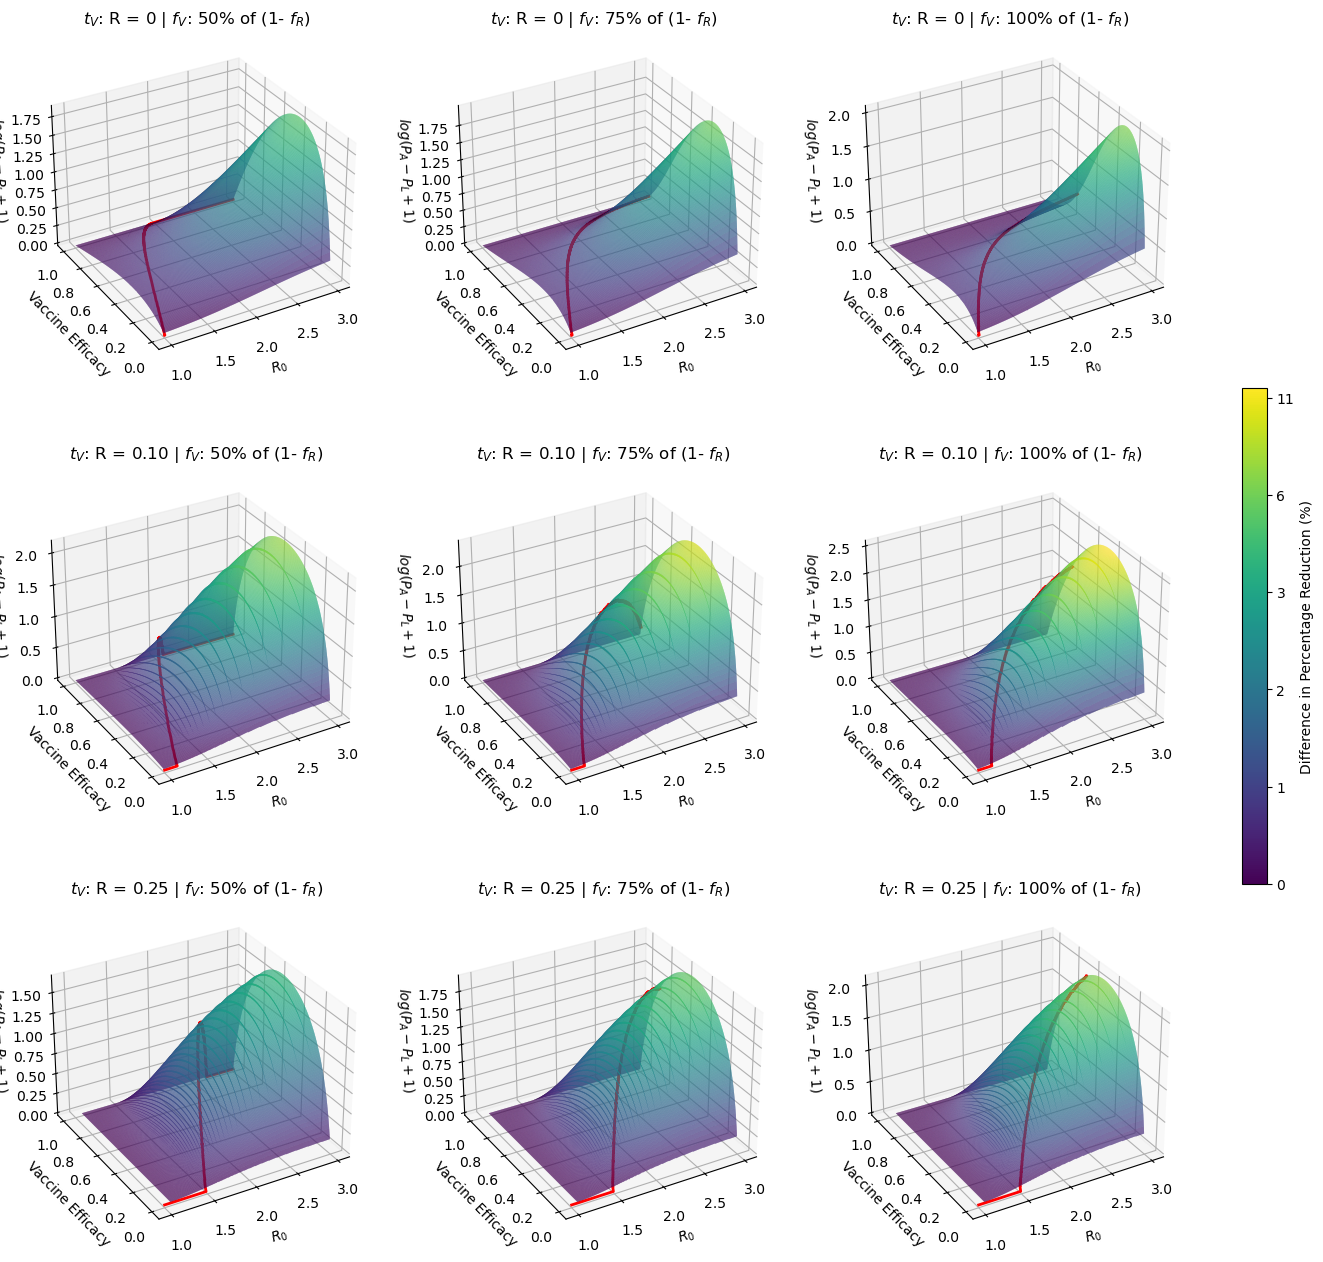

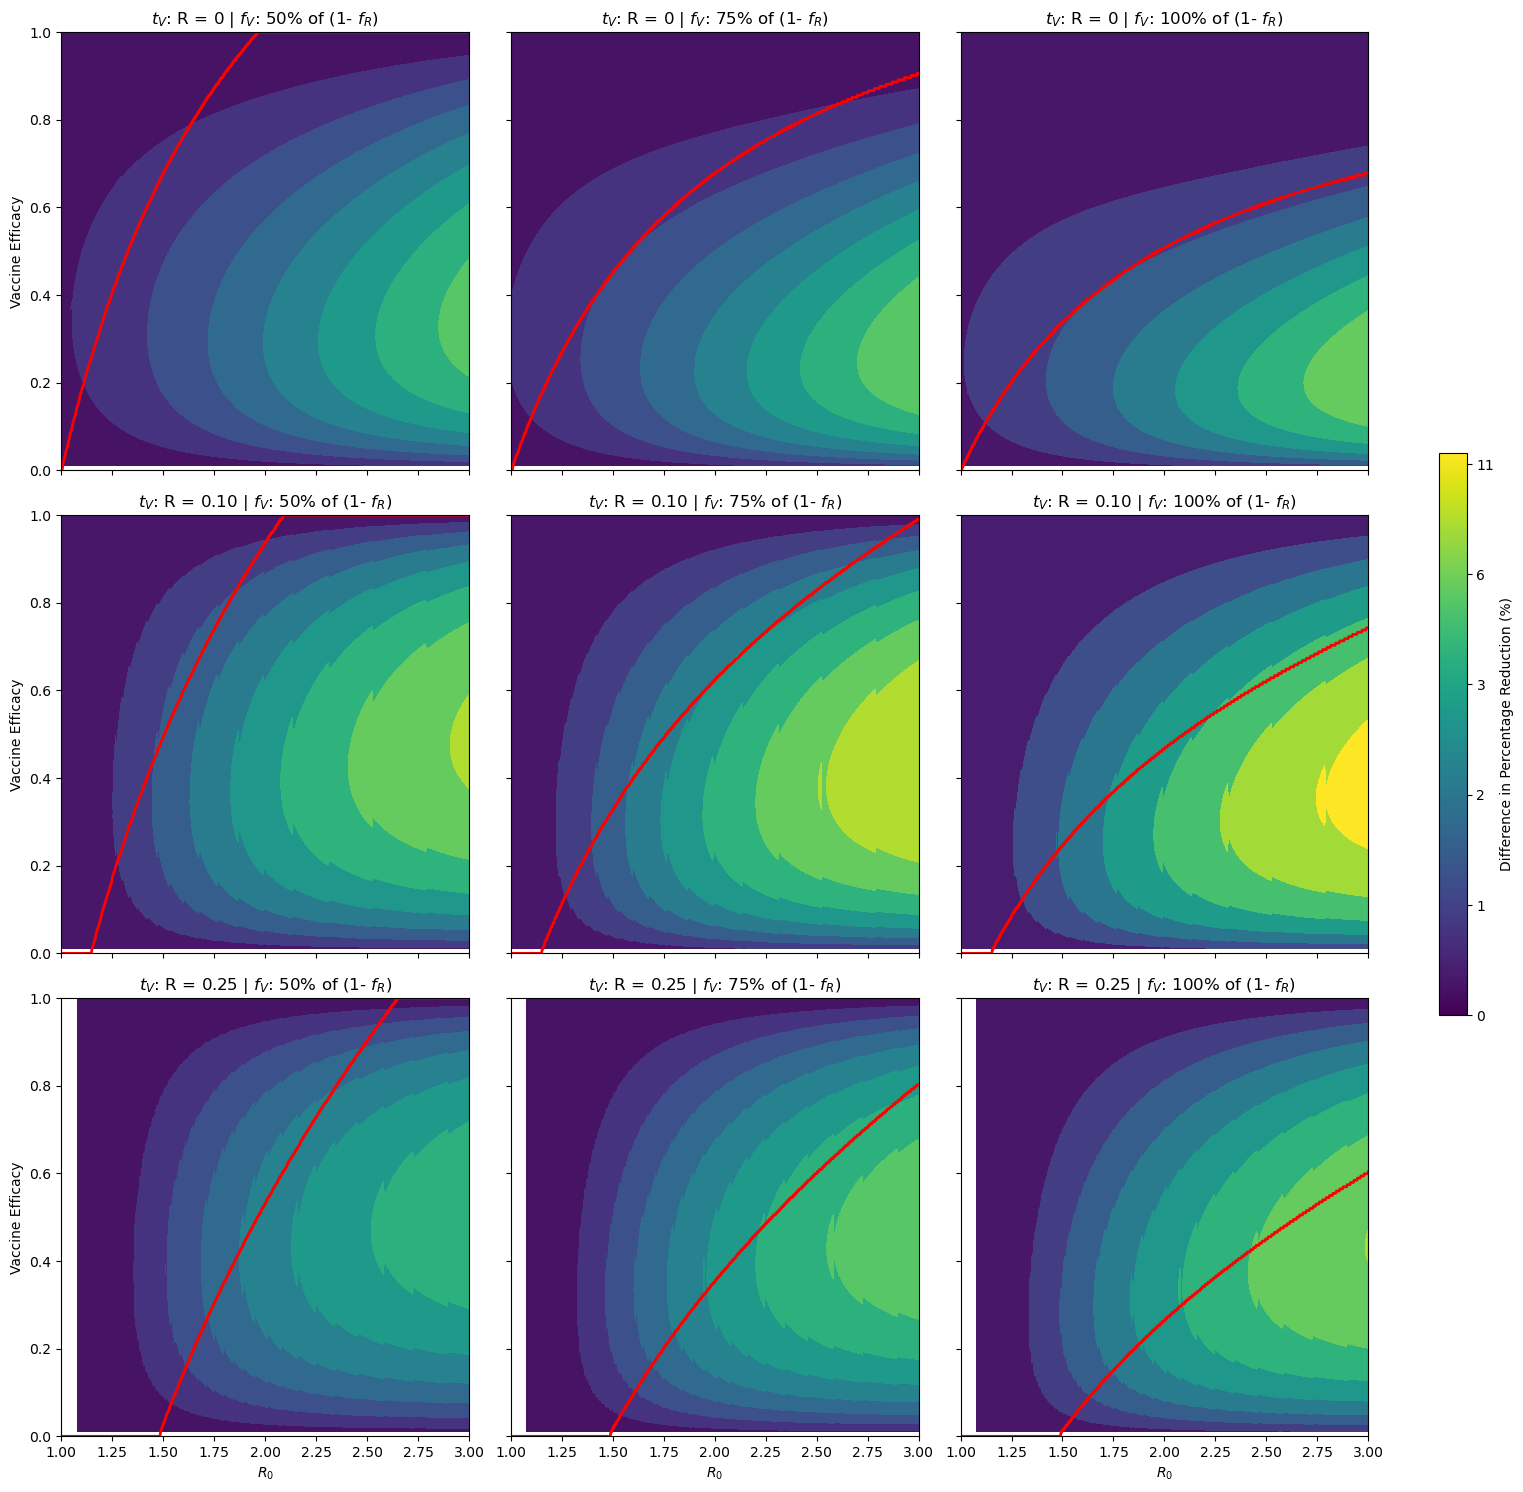

In [2]:
# define parameter values and initial conditions
sigma = 1 / 4
gamma = 1 / 4
t = 200
covs = np.array([0.5, 0.75, 1.0])
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
y0 = [s0, e0, i0, r0]
R0s = np.linspace(1.0, 3.0, 601)
epss = np.linspace(0.01, 1, 201)

# run scenarios varying R0 values and vaccine efficacy
size0_m30 = run_scenarios(
    y0=y0,
    t=t,
    size=0,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=30,
)
size10_m30 = run_scenarios(
    y0=y0,
    t=t,
    size=0.1,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=30,
)
size25_m30 = run_scenarios(
    y0=y0,
    t=t,
    size=0.25,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=30,
)

# plot difference in percentage reduction
plt.rcParams["pdf.fonttype"] = 42
fig_3d = plot_scenarios(
    size0_m30, size10_m30, size25_m30, R0s, epss, dim=3, mask_hit=False
)
plt.savefig("diffPerc_m30_3d.pdf", format="pdf", bbox_inches="tight")
fig_2d = plot_scenarios(
    size0_m30, size10_m30, size25_m30, R0s, epss, dim=2, mask_hit=False
)
plt.savefig("diffPerc_m30_2d.pdf", format="pdf", bbox_inches="tight")

# store dataframes
%store size0_m30
%store size10_m30
%store size25_m30

## Measured 60 Days After Vaccination

In [ ]:
# define parameter values and initial conditions
sigma = 1 / 4
gamma = 1 / 4
t = 200
covs = np.array([0.5, 0.75, 1.0])
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
y0 = [s0, e0, i0, r0]
R0s = np.linspace(1.0, 3.0, 601)
epss = np.linspace(0.01, 1, 201)

# run scenarios varying R0 values and vaccine efficacy
size0_m60 = run_scenarios(
    y0=y0,
    t=t,
    size=0,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=60,
)
size10_m60 = run_scenarios(
    y0=y0,
    t=t,
    size=0.1,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=60,
)
size25_m60 = run_scenarios(
    y0=y0,
    t=t,
    size=0.25,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=60,
)

# plot difference in total effectiveness for each scenario
plt.rcParams["pdf.fonttype"] = 42
fig_3d = plot_scenarios(
    size0_m60, size10_m60, size25_m60, R0s, epss, dim=3, mask_hit=False
)
plt.savefig("diffPerc_m60_3d.pdf", format="pdf", bbox_inches="tight")
fig_2d = plot_scenarios(
    size0_m60, size10_m60, size25_m60, R0s, epss, dim=2, mask_hit=False
)
plt.savefig("diffPerc_m60_2d.pdf", format="pdf", bbox_inches="tight")

# store dataframes
%store size0_m60
%store size10_m60
%store size25_m60

## Measured 100 Days After Vaccination

In [ ]:
# define parameter values and initial conditions
sigma = 1 / 4
gamma = 1 / 4
t = 200
covs = np.array([0.5, 0.75, 1.0])
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
y0 = [s0, e0, i0, r0]
R0s = np.linspace(1.0, 3.0, 601)
epss = np.linspace(0.01, 1, 201)

# run scenarios varying R0 values and vaccine efficacy
size0_m100 = run_scenarios(
    y0=y0,
    t=t,
    size=0,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=100,
)
size10_m100 = run_scenarios(
    y0=y0,
    t=t,
    size=0.1,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=100,
)
size25_m100 = run_scenarios(
    y0=y0,
    t=t,
    size=0.25,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=100,
)

# plot difference in total effectiveness for each scenario
plt.rcParams["pdf.fonttype"] = 42
fig_3d = plot_scenarios(
    size0_m100, size10_m100, size25_m100, R0s, epss, dim=3, mask_hit=False
)
plt.savefig("diffPerc_m100_3d.pdf", format="pdf", bbox_inches="tight")
fig_2d = plot_scenarios(
    size0_m100, size10_m100, size25_m100, R0s, epss, dim=2, mask_hit=False
)
plt.savefig("diffPerc_m100_2d.pdf", format="pdf", bbox_inches="tight")

# store dataframes
%store size0_m100
%store size10_m100
%store size25_m100

## Measured 200 Days After Vaccination (End of Pandemic)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 601/601 [30:25<00:00,  3.04s/it]


Stored 'size0_m200' (DataFrame)
Stored 'size10_m200' (DataFrame)
Stored 'size25_m200' (DataFrame)


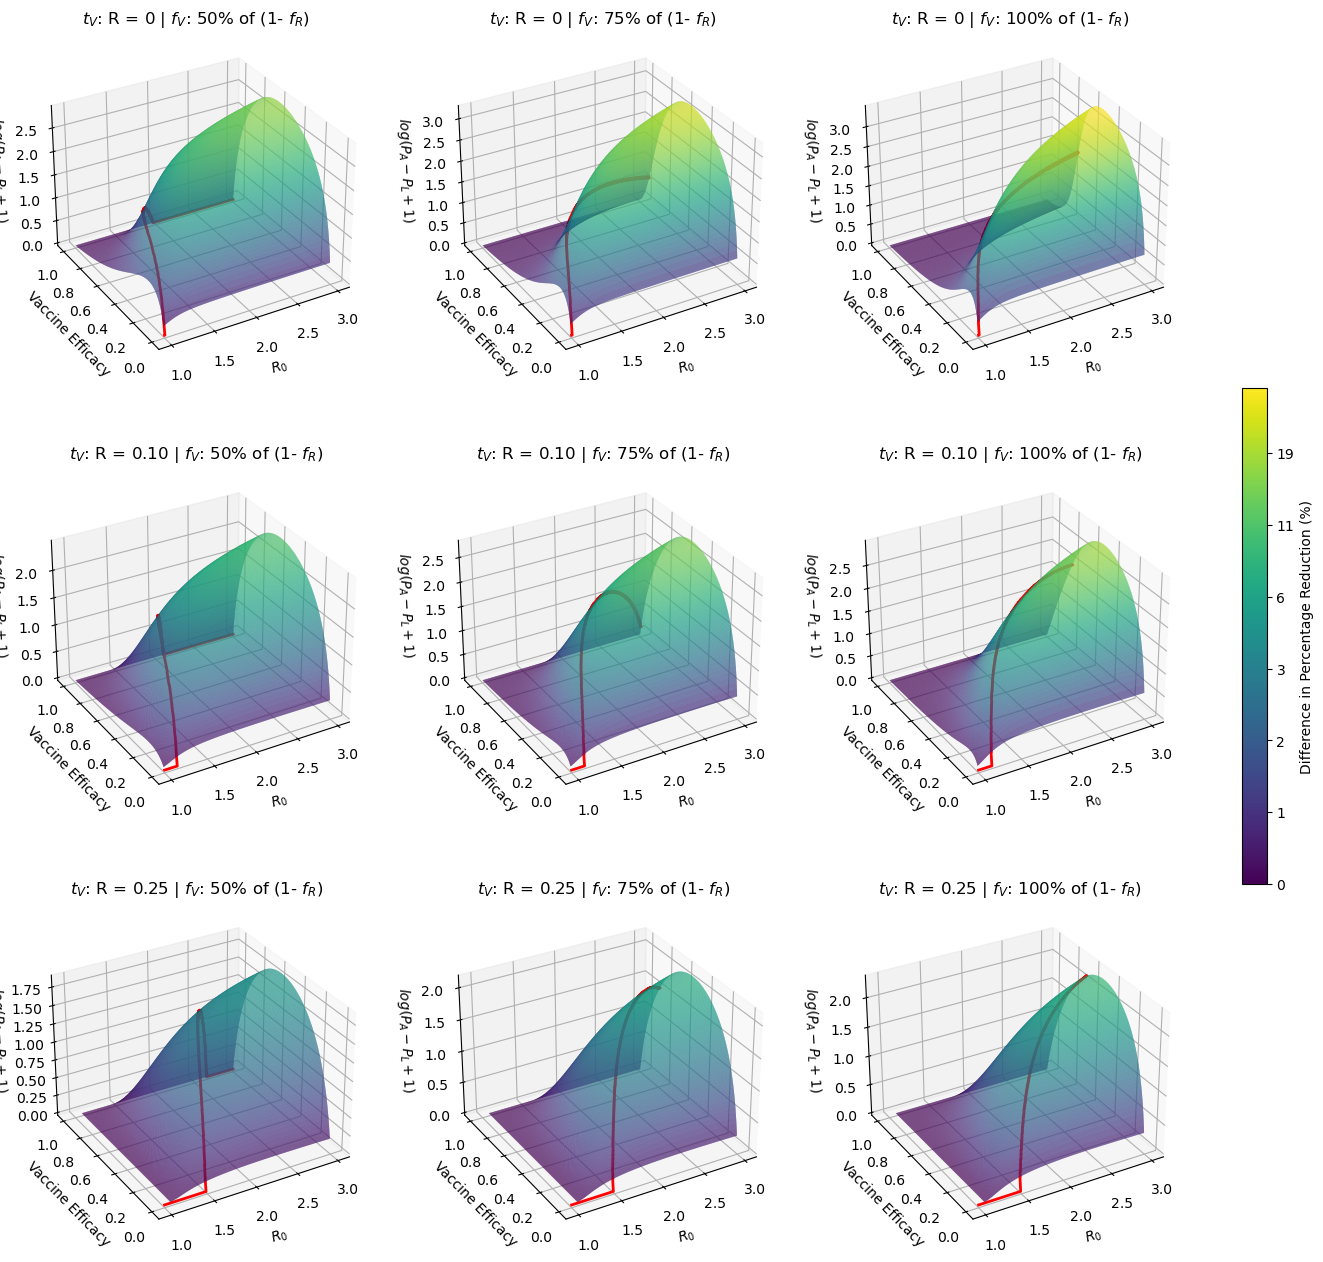

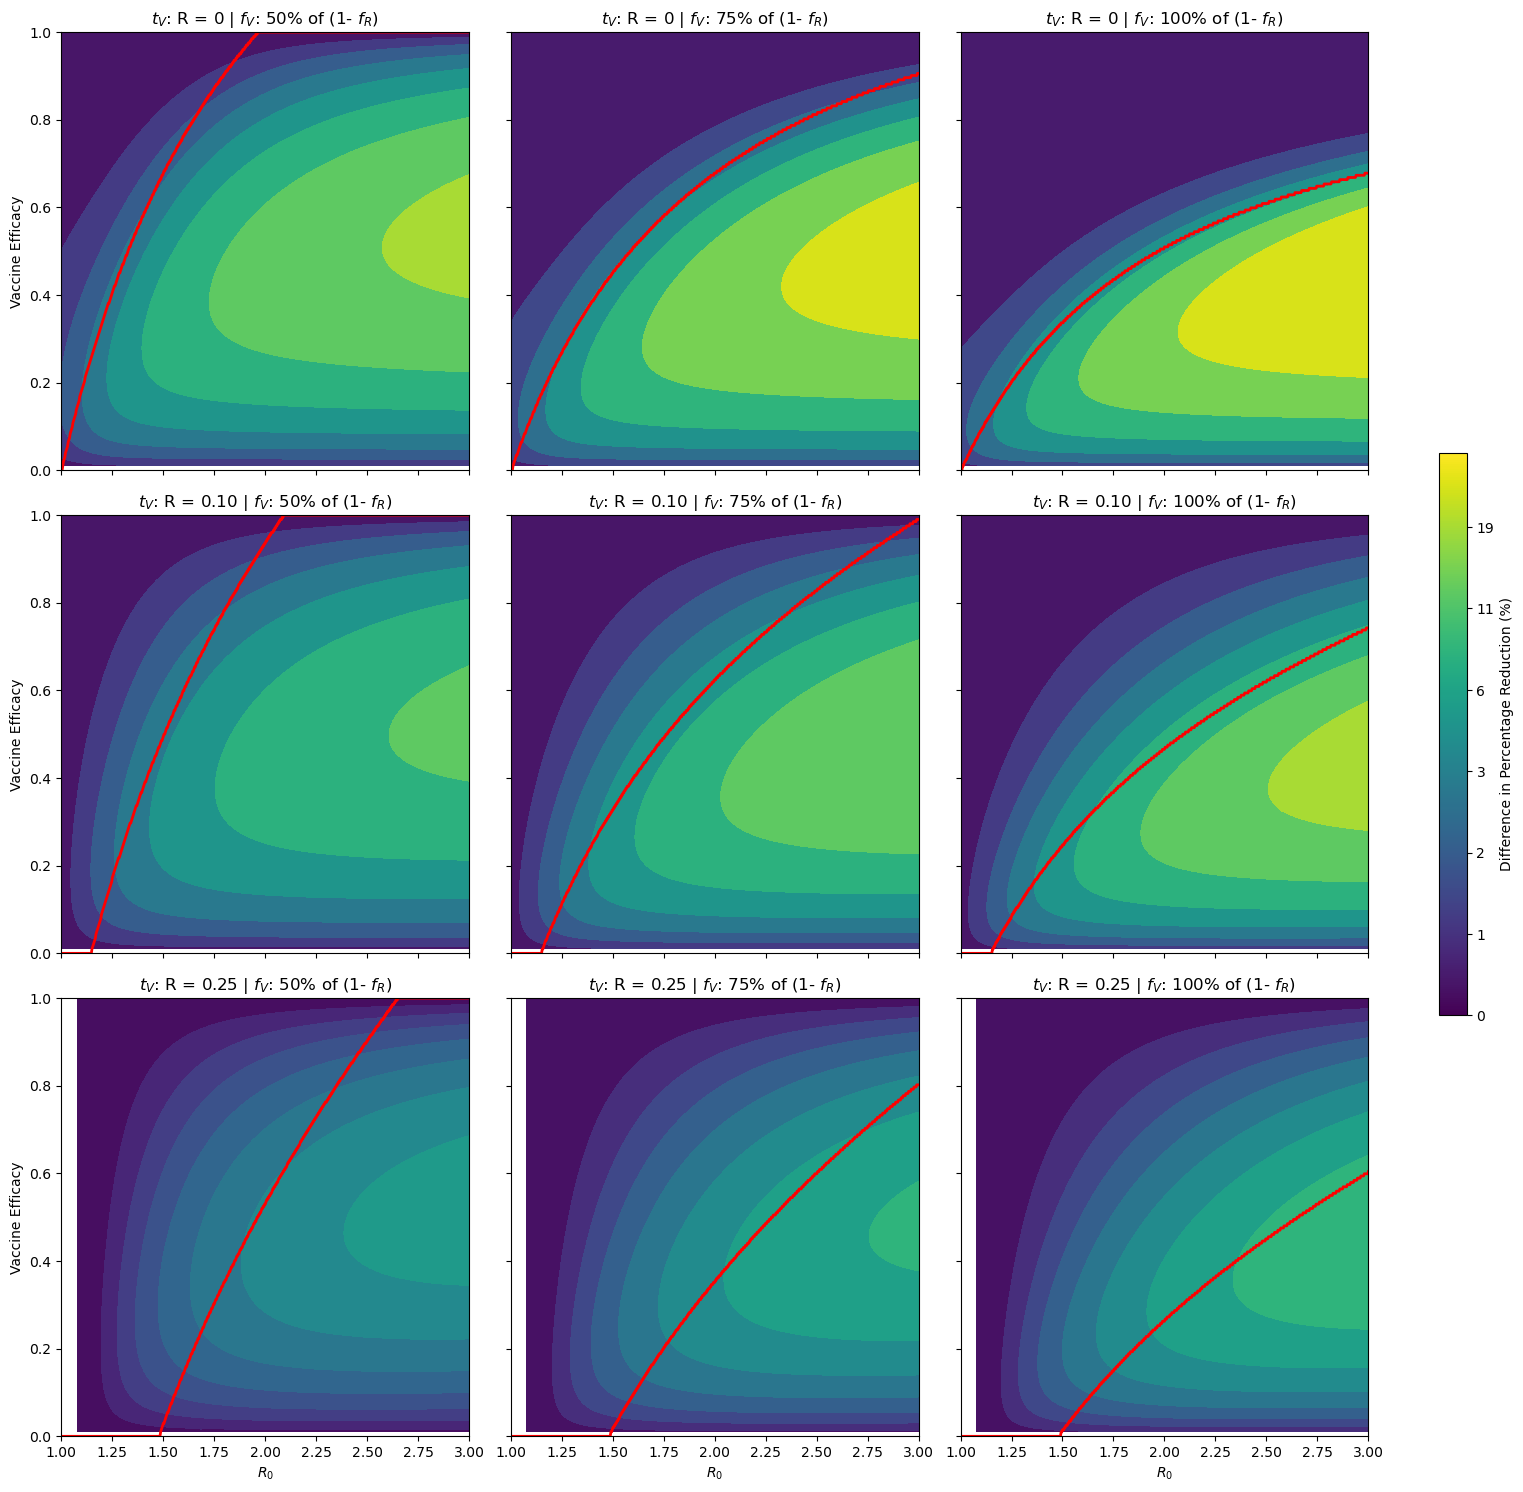

In [3]:
# define parameter values and initial conditions
sigma = 1 / 4
gamma = 1 / 4
t = 200
covs = np.array([0.5, 0.75, 1.0])
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
y0 = [s0, e0, i0, r0]
R0s = np.linspace(1.0, 3.0, 601)
epss = np.linspace(0.01, 1, 201)

# run scenarios varying R0 values and vaccine efficacy
size0_m200 = run_scenarios(
    y0=y0,
    t=t,
    size=0,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=200,
)
size10_m200 = run_scenarios(
    y0=y0,
    t=t,
    size=0.1,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=200,
)
size25_m200 = run_scenarios(
    y0=y0,
    t=t,
    size=0.25,
    covs=covs,
    R0s=R0s,
    sigma=sigma,
    gamma=gamma,
    w=0,
    epss=epss,
    measured=200,
)

# plot difference in total effectiveness for each scenario
plt.rcParams["pdf.fonttype"] = 42
fig_3d = plot_scenarios(
    size0_m200, size10_m200, size25_m200, R0s, epss, dim=3, mask_hit=False
)
plt.savefig("diffPerc_m200_3d.pdf", format="pdf", bbox_inches="tight")
fig_2d = plot_scenarios(
    size0_m200, size10_m200, size25_m200, R0s, epss, dim=2, mask_hit=False
)
plt.savefig("diffPerc_m200_2d.pdf", format="pdf", bbox_inches="tight")

# store dataframes
%store size0_m200
%store size10_m200
%store size25_m200

In [4]:
# Save dataframes

size0_m200.to_csv('size0_m200.csv', index=False)
size10_m200.to_csv('size10_m200.csv', index=False)
size25_m200.to_csv('size25_m200.csv', index=False)

In [2]:
size0_m200 = pd.read_csv('size0_m200.csv')
size10_m200 = pd.read_csv('size10_m200.csv')
size25_m200 = pd.read_csv('size25_m200.csv')

In [5]:
# % of points where diff is greater than 5%
diff0 = size0_m200['Diff']
diff10 = size10_m200['Diff']
diff25 = size25_m200['Diff']

# Remove the artifically high limits 
diff0 = np.asarray([element for element in diff0 if element < 99999.0])
diff10 = np.asarray([element for element in diff10 if element < 99999.0])
diff25 = np.asarray([element for element in diff25 if element < 99999.0])

threshold = 5

frac_geq_threshold = (len(np.where(diff0>=threshold)[0]) + len(np.where(diff10>=threshold)[0])+ len(np.where(diff25>=threshold)[0]))/(len(diff0)+len(diff10)+len(diff25))

frac_geq_threshold

0.3477379022490544

## Appendix

We additionally mask regimes for which $f_V > f_V^*$ in order to confirm the red lines are correctly drawn.

### Measured 30 Days After Vaccination


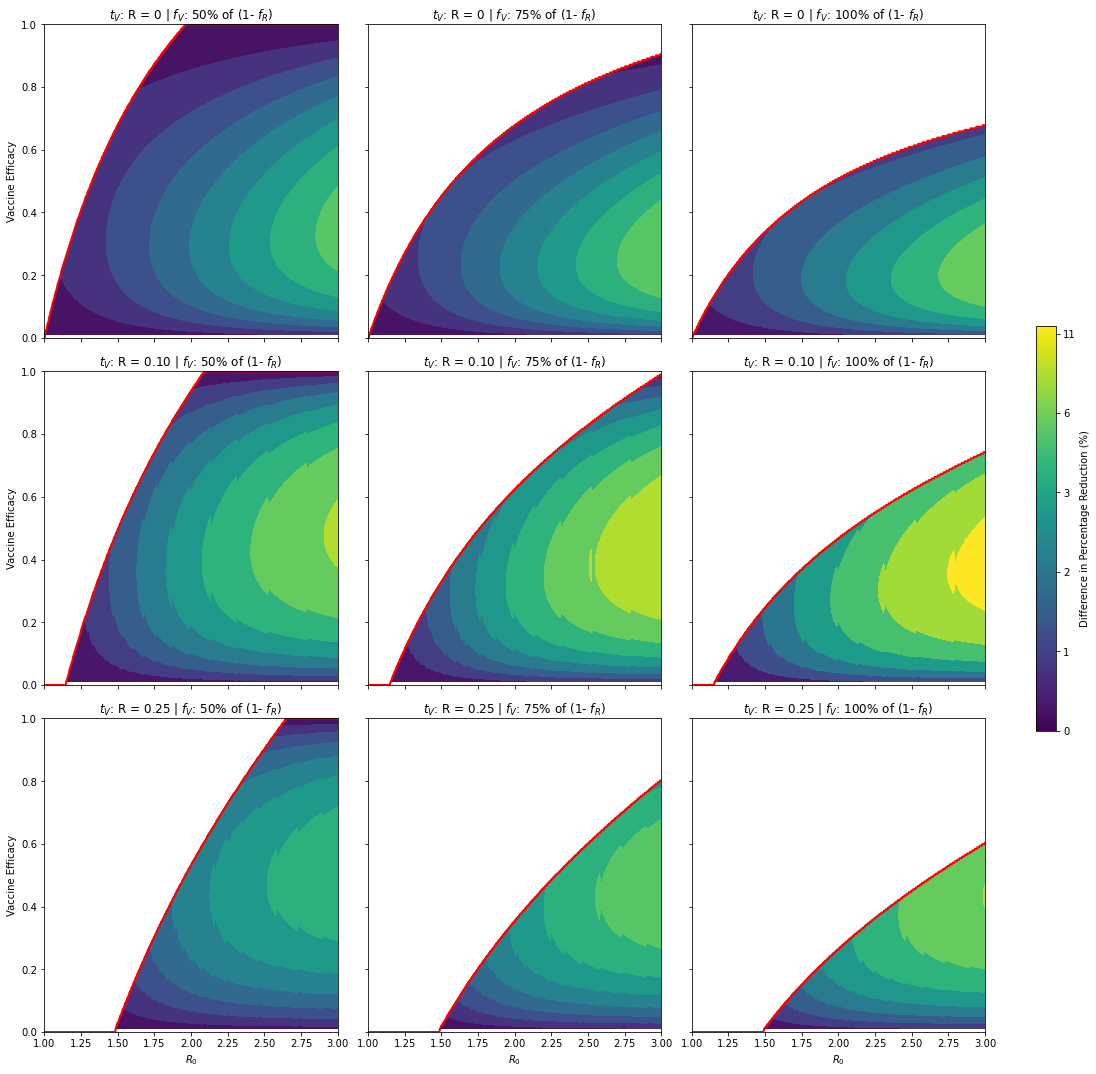

In [7]:
%store -r size0_m30
%store -r size10_m30
%store -r size25_m30
R0s = np.linspace(1.0, 3.0, 601)
epss = np.linspace(0.01, 1, 201)

plt.rcParams["pdf.fonttype"] = 42
fig_2d = plot_scenarios(
    size0_m30, size10_m30, size25_m30, R0s, epss, dim=2, mask_hit=True
)
plt.savefig("diffPerc_m30_2d_masked.pdf", format="pdf", bbox_inches="tight")

### Measured 60 Days After Vaccination

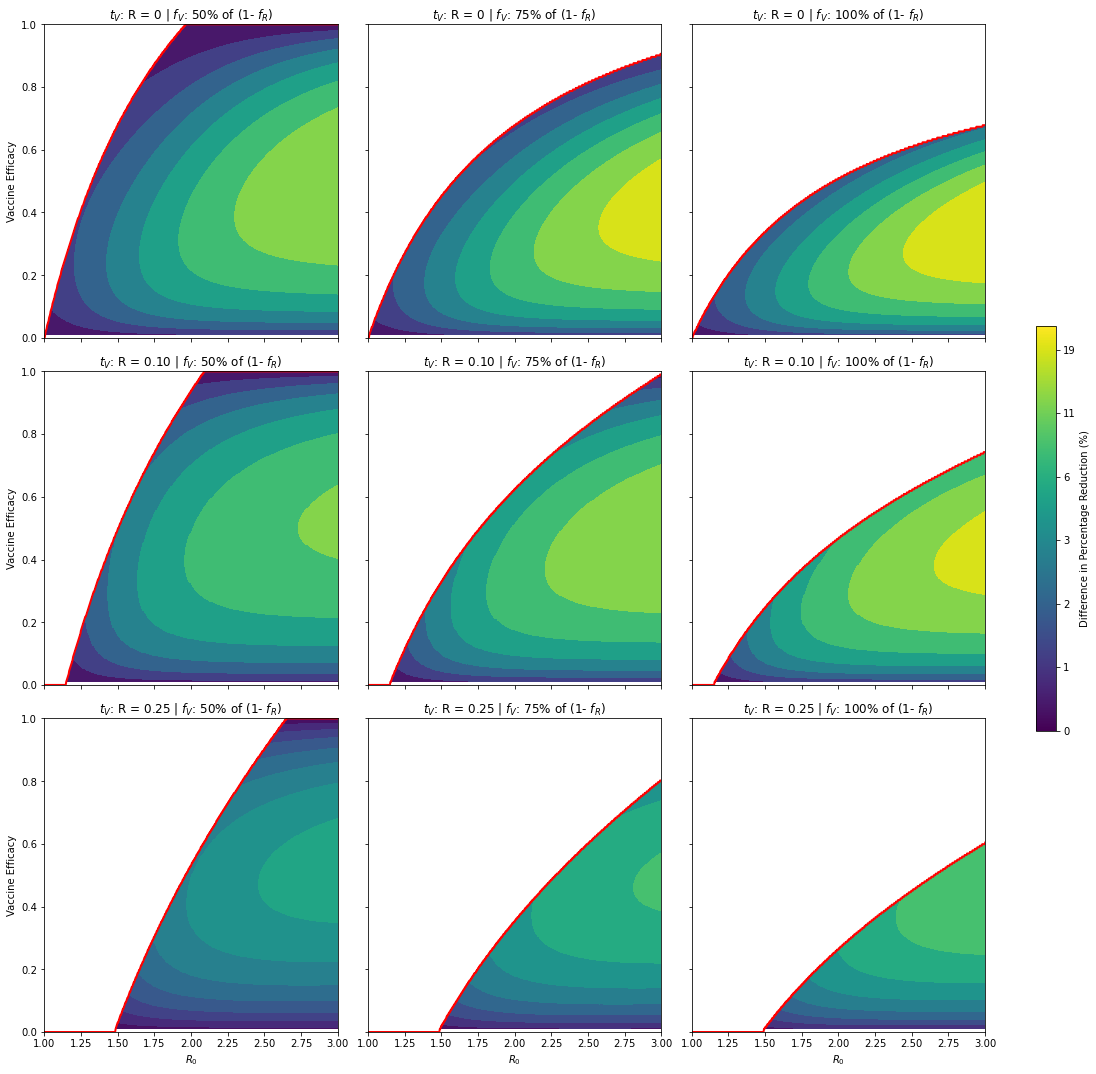

In [8]:
%store -r size0_m60
%store -r size10_m60
%store -r size25_m60

plt.rcParams["pdf.fonttype"] = 42
fig_2d = plot_scenarios(
    size0_m60, size10_m60, size25_m60, R0s, epss, dim=2, mask_hit=True
)
plt.savefig("diffPerc_m60_2d_masked.pdf", format="pdf", bbox_inches="tight")

### Measured 100 Days After Vaccination

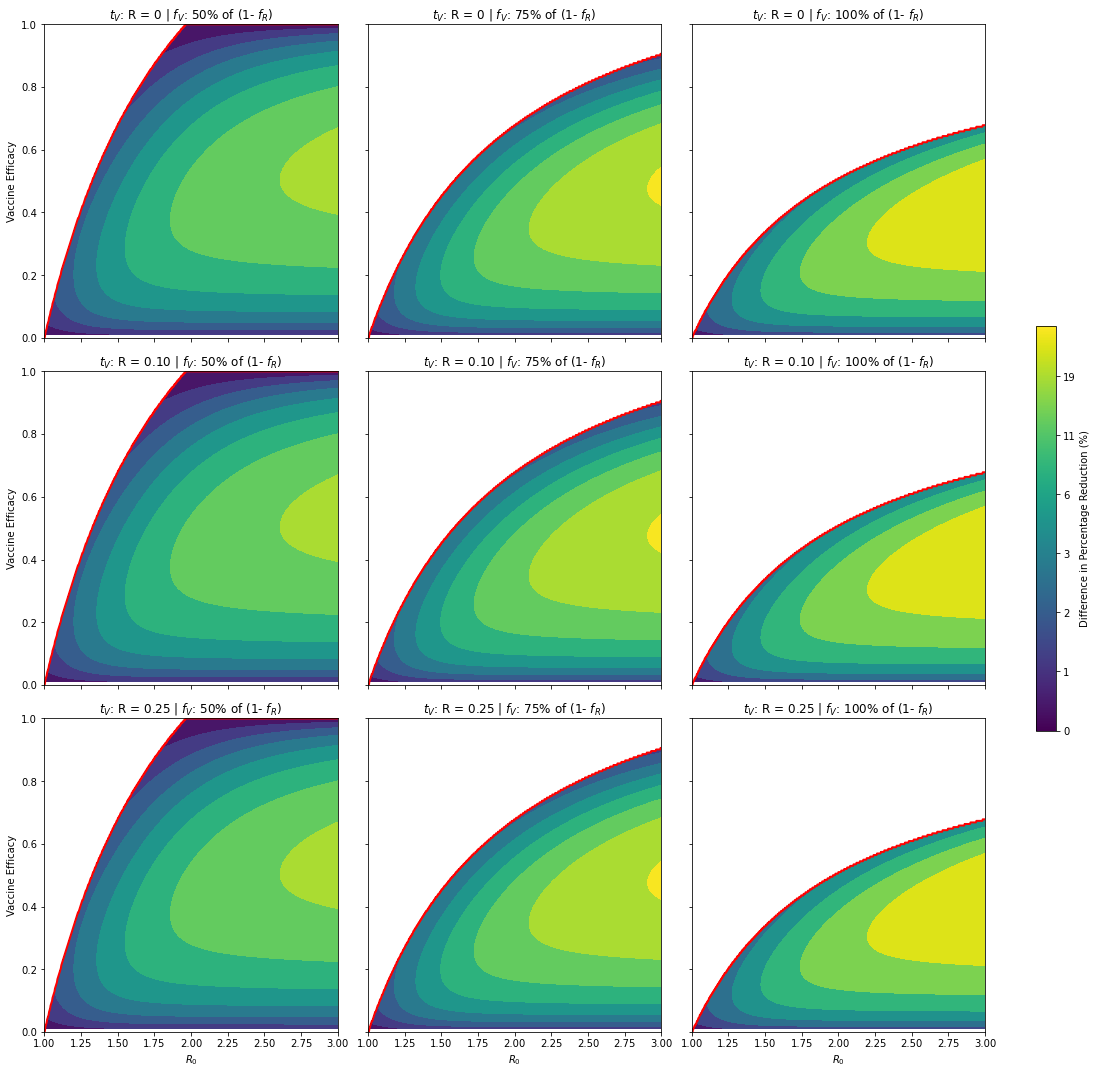

In [9]:
%store -r size0_m100
%store -r size10_m100
%store -r size25_m100

plt.rcParams["pdf.fonttype"] = 42
fig_2d = plot_scenarios(
    size0_m100, size10_m100, size25_m100, R0s, epss, dim=2, mask_hit=True
)
plt.savefig("diffPerc_m100_2d_masked.pdf", format="pdf", bbox_inches="tight")

### Measured 200 Days After Vaccination (End of Pandemic)

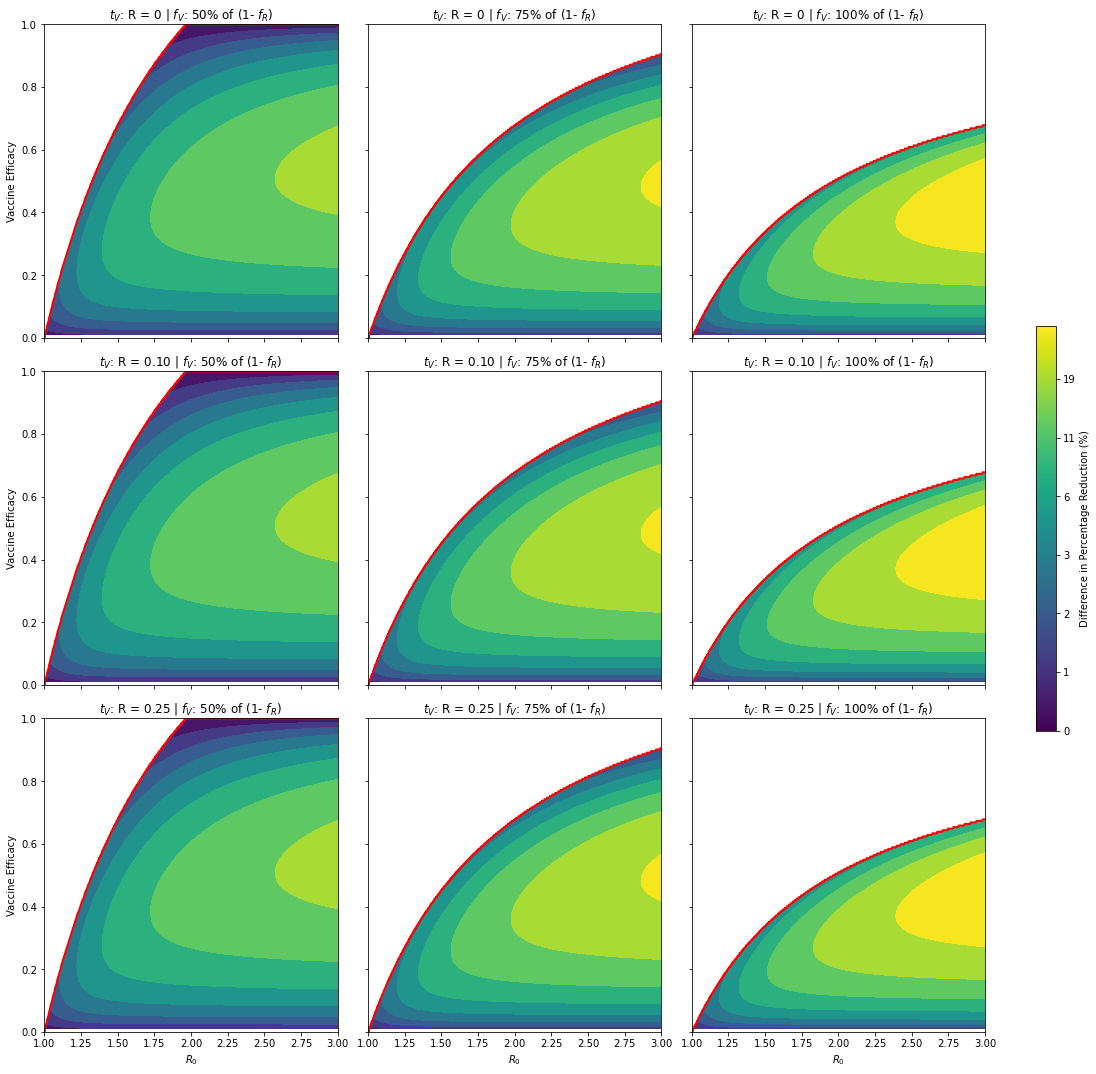

In [10]:
%store -r size0_m200
%store -r size10_m200
%store -r size25_m200

plt.rcParams["pdf.fonttype"] = 42
fig_2d = plot_scenarios(
    size0_m200, size10_m200, size25_m200, R0s, epss, dim=2, mask_hit=True
)
plt.savefig("diffPerc_m200_2d_masked.pdf", format="pdf", bbox_inches="tight")